In [3]:
from __future__ import division
from __future__ import print_function
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
from pandas.io.pytables import IndexCol
from pandas.core.frame import DataFrame
from requests.api import head
from sklearn import svm
from numpy import newaxis
from pip.req.req_file import preprocess
from mistune import preprocessing
from sklearn.linear_model.base import LinearRegression
sns.set()

In [4]:
%cd ..

C:\Users\chibok


In [9]:
data = pd.read_csv('raw_data_number.csv', header=0, encoding='cp949')
print(data.tail())


        code   gu  dong  disable  fire  bank  seniorcenter  movingin  \
418  강동구둔촌1동  강동구  둔촌1동      455    10     2             8      2849   
419  강동구둔촌2동  강동구  둔촌2동     1003    13     7             5      4076   
420  강동구암사1동  강동구  암사1동     1617    15     4             3      6099   
421  강동구천호2동  강동구  천호2동     1847    29     7            13      5960   
422    강동구길동  강동구    길동     1950    37     9            15      7373   

     movingout  older  
418       3050    665  
419       4385    453  
420       6374    821  
421       6265    186  
422       7939    508  


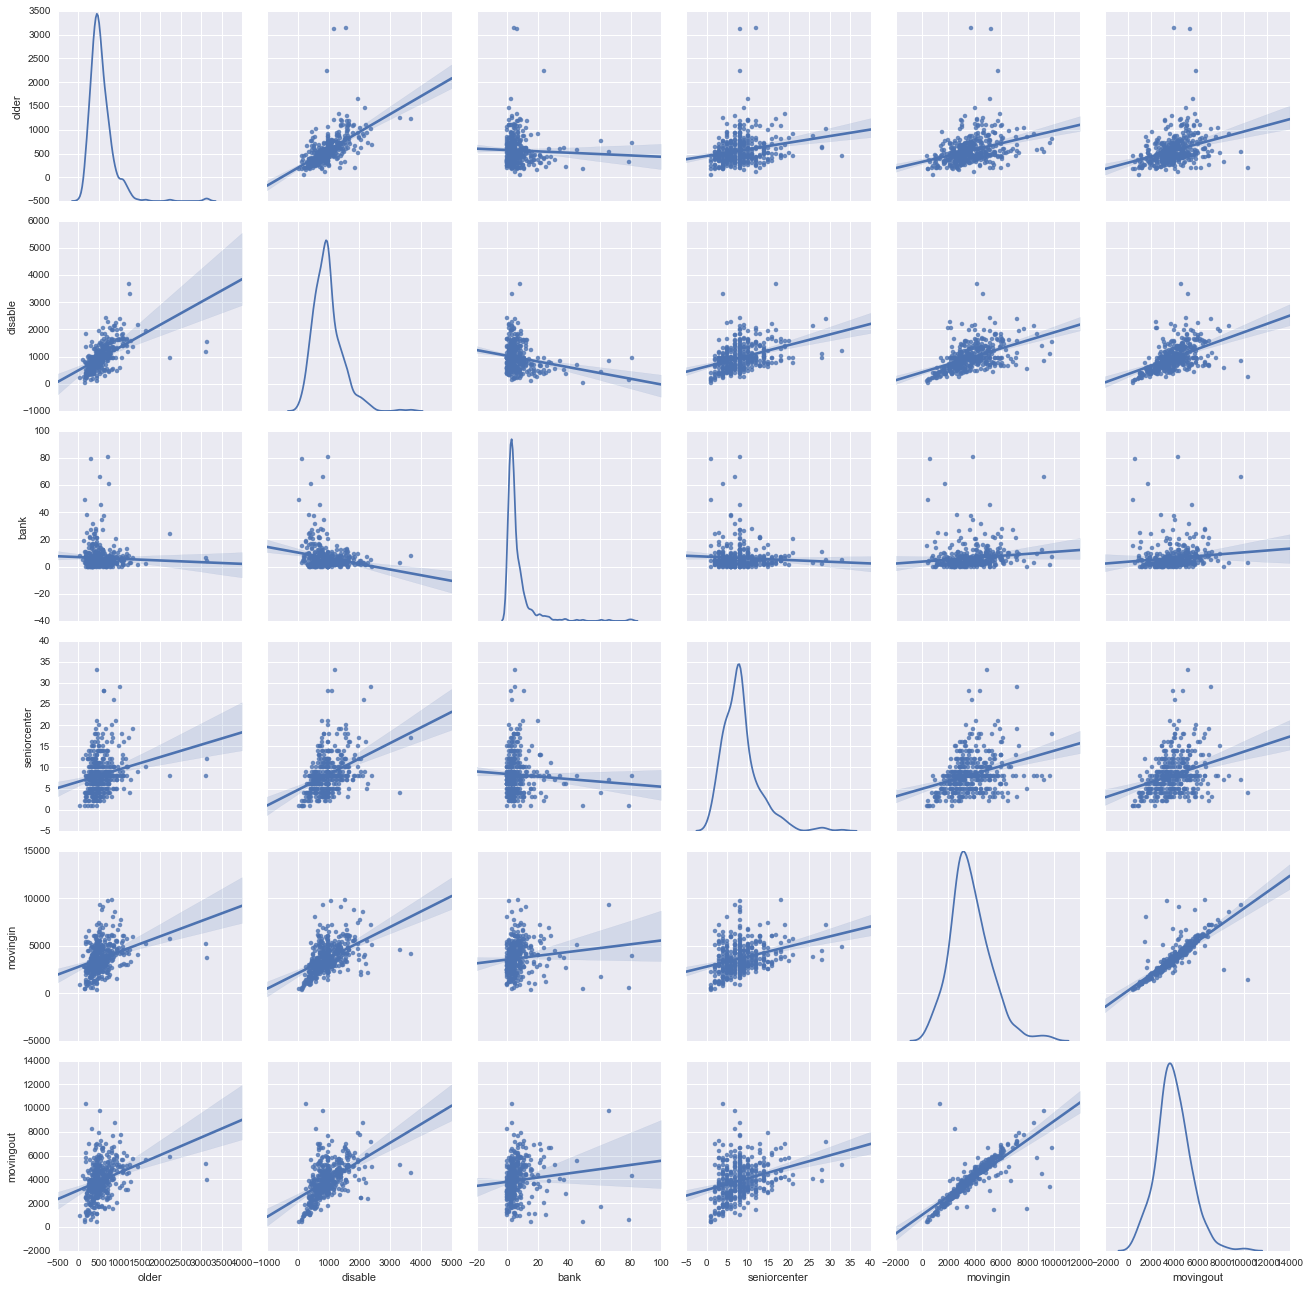

In [11]:
# 눈으로 자료의 관계성 확인
# 질문? plt 조절
sns.pairplot(data, diag_kind="kde", kind="reg" ,vars = ['older', 'disable', 'bank', 'seniorcenter', 'movingin', 'movingout'], size=3)
plt.show()

x,y 정해주기

In [29]:
y = data['older']
x = data.drop(labels = ['code', 'gu', 'dong', 'older'], axis=1)
dfy = data[['code', 'older']]


               disable      fire      bank  seniorcenter  movingin  movingout  \
disable       1.000000  0.185589 -0.209666      0.380607  0.488196   0.489488   
fire          0.185589  1.000000  0.489940      0.075529  0.411065   0.429240   
bank         -0.209666  0.489940  1.000000     -0.061527  0.119592   0.109945   
seniorcenter  0.380607  0.075529 -0.061527      1.000000  0.308768   0.295052   
movingin      0.488196  0.411065  0.119592      0.308768  1.000000   0.824094   
movingout     0.489488  0.429240  0.109945      0.295052  0.824094   1.000000   
older         0.562763  0.251880 -0.042128      0.201830  0.323813   0.311607   

                 older  
disable       0.562763  
fire          0.251880  
bank         -0.042128  
seniorcenter  0.201830  
movingin      0.323813  
movingout     0.311607  
older         1.000000  


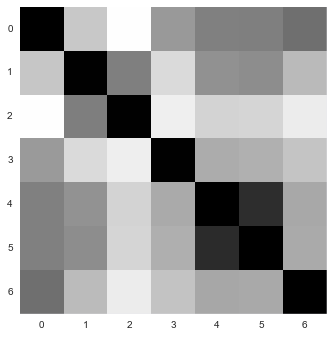

In [13]:
# correlation 확인
print(data.corr())
plt.imshow(data.corr(), interpolation="none")
plt.grid(False)
plt.show()

In [14]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize
x_scale = pd.DataFrame(scale(x), index = x.index, columns = x.columns)
x_scale_norm = pd.DataFrame(normalize(x_scale), columns = x.columns)

In [16]:
x_scale_norm.tail()

,disable,fire,bank,seniorcenter,movingin,movingout
418,-0.733824,-0.281364,-0.312013,-0.039266,-0.358154,-0.393915
419,0.098034,-0.075450,0.089695,-0.862092,0.307550,0.372642
420,0.477991,0.059537,-0.085044,-0.397464,0.533508,0.564038
421,0.530854,0.515050,0.021055,0.293519,0.412907,0.442526
422,0.402863,0.531028,0.055482,0.283710,0.454244,0.515562


      disable      fire      bank  seniorcenter  movingin  movingout  older
418 -0.733824 -0.281364 -0.312013     -0.039266 -0.358154  -0.393915    665
419  0.098034 -0.075450  0.089695     -0.862092  0.307550   0.372642    453
420  0.477991  0.059537 -0.085044     -0.397464  0.533508   0.564038    821
421  0.530854  0.515050  0.021055      0.293519  0.412907   0.442526    186
422  0.402863  0.531028  0.055482      0.283710  0.454244   0.515562    508


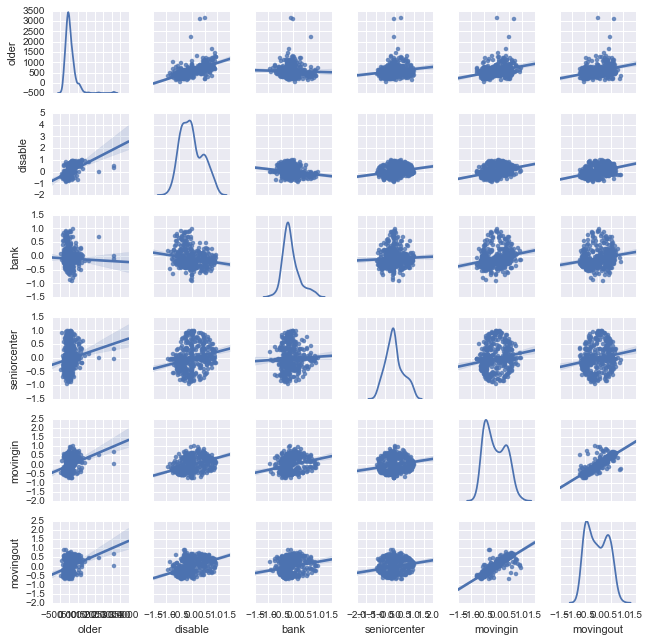

In [23]:
#scaling => normalize 된 것의 pairplot을 위해 잠시 y를 붙인 x_test를 만듦
x_test = pd.concat([x_scale_norm, y], axis=1)
print(x_test.tail())
sns.pairplot(x_test, diag_kind="kde", kind="reg" ,vars = ['older', 'disable', 'bank', 'seniorcenter', 'movingin', 'movingout'], size=1.5)
plt.show()

In [19]:
import statsmodels.api as sm

In [20]:
model_OLS = sm.OLS(y,x_scale_norm) 
result_OLS = model_OLS.fit()
print(result_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                  older   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     9.597
Date:                Thu, 25 Feb 2016   Prob (F-statistic):           6.75e-10
Time:                        12:36:40   Log-Likelihood:                -3308.1
No. Observations:                 423   AIC:                             6628.
Df Residuals:                     417   BIC:                             6653.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
disable        261.7476     85.699      3.054   

In [24]:
# 3-2 intercept 추가

x_intercept = sm.add_constant(x_scale_norm)
model_OLS = sm.OLS(y,x_intercept) 
result_OLS = model_OLS.fit()
print(result_OLS.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.316    
Dependent Variable: older            AIC:                5898.7619
Date:               2016-02-25 12:44 BIC:                5927.0935
No. Observations:   423              Log-Likelihood:     -2942.4  
Df Model:           6                F-statistic:        33.42    
Df Residuals:       416              Prob (F-statistic): 6.86e-33 
R-squared:          0.325            Scale:              65564.   
------------------------------------------------------------------
                Coef.   Std.Err.    t    P>|t|    [0.025   0.975] 
------------------------------------------------------------------
const          577.2075  13.1432 43.9168 0.0000  551.3721 603.0429
disable        356.8883  36.2059  9.8572 0.0000  285.7190 428.0577
fire           104.0525  33.8127  3.0773 0.0022   37.5875 170.5176
bank             0.3385  43.8925  0.0077 0.9939  -85.9403  86.6172
seniorcenter

In [25]:
x_intercept = x_intercept.drop(labels = ['bank', 'movingout', 'seniorcenter', 'movingin'], axis=1)
model_OLS = sm.OLS(y,x_intercept) 
result_OLS = model_OLS.fit()
print(result_OLS.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.319    
Dependent Variable: older            AIC:                5892.6823
Date:               2016-02-25 12:44 BIC:                5904.8244
No. Observations:   423              Log-Likelihood:     -2943.3  
Df Model:           2                F-statistic:        99.82    
Df Residuals:       420              Prob (F-statistic): 3.42e-36 
R-squared:          0.322            Scale:              65235.   
-------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
const       575.9826   12.6275  45.6133  0.0000  551.1616  600.8036
disable     373.9674   30.3681  12.3145  0.0000  314.2749  433.6599
fire        114.2207   30.7503   3.7145  0.0002   53.7771  174.6644
------------------------------------------------------------------
Omnibu

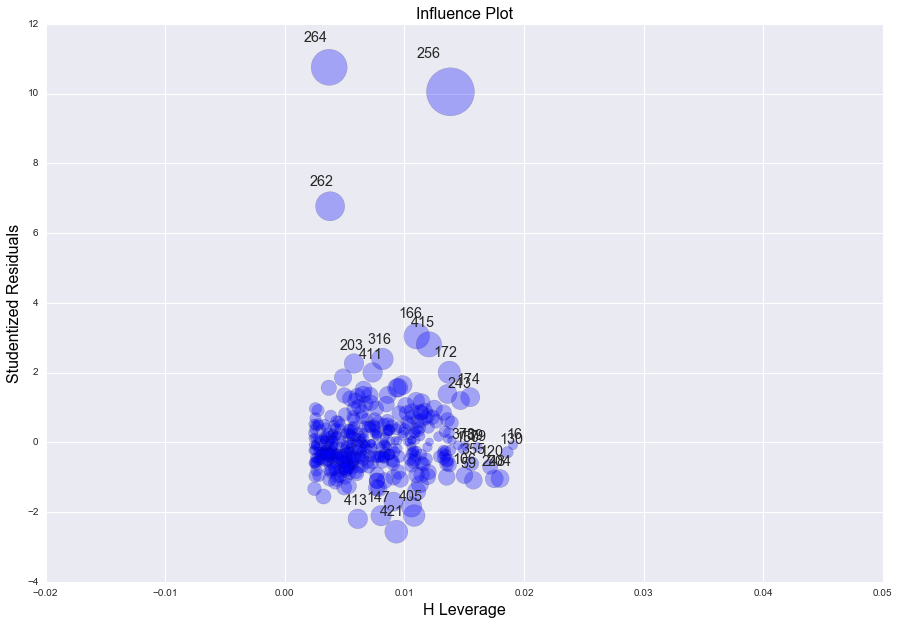

In [33]:
fig, ax = plt.subplots(figsize=(15, 10))
sm.graphics.influence_plot(result_OLS, plot_alpha=0.3, ax=ax)
plt.show()

# Outlier

# Outlier를 feature selecting 전에 할 수도 있다.

In [34]:
idx_outlier = np.nonzero(result_OLS.outlier_test().ix[:, -1].abs() < 0.01)[0]
idx_outlier

array([256, 262, 264], dtype=int64)

In [36]:
print(dfy.ix[[264, 262, 256]])

        code  older
264  구로구구로5동   3115
262  구로구구로3동   2237
256  강서구방화2동   3146


 # Outlier 제거 후 Regression

In [35]:
x_intercept_out = x_intercept.drop(idx_outlier)
y_out = y.drop(idx_outlier)
model_OLS_out = sm.OLS(y_out, x_intercept_out)
result_OLS_out = model_OLS_out.fit()
print(result_OLS_out.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.449    
Dependent Variable: older            AIC:                5551.7441
Date:               2016-02-25 12:51 BIC:                5563.8649
No. Observations:   420              Log-Likelihood:     -2772.9  
Df Model:           2                F-statistic:        171.8    
Df Residuals:       417              Prob (F-statistic): 3.80e-55 
R-squared:          0.452            Scale:              31998.   
-------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
const       558.1731    8.8864  62.8118  0.0000  540.7053  575.6409
disable     355.3655   21.2979  16.6855  0.0000  313.5009  397.2301
fire         83.0337   21.6393   3.8372  0.0001   40.4979  125.5695
------------------------------------------------------------------
Omnibu

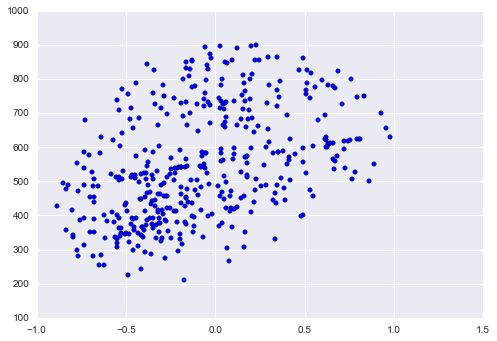

In [37]:
# R-square 눈으로 확인하기
plt.scatter(x_intercept_out.ix[:, -1], result_OLS_out.fittedvalues)
plt.show()

# 5. Closs-validation(K-Fold) 

In [41]:
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold

x_out = x_scale_norm.drop(idx_outlier)
print("r2_score : " , cross_val_score(LinearRegression(), x, y, "r2", KFold(len(x_scale_norm))))
print("mean_squared_error : " , cross_val_score(LinearRegression(), x, y, "mean_squared_error", KFold(len(x_scale_norm))))

r2_score :  [ 0.60689608  0.19953582 -0.09527471]
mean_squared_error :  [ -21582.84636227 -138513.92484653  -45361.77459546]


# SVR(Support Vector Regression)

In [42]:
x = x.drop(labels = ['bank', 'movingout', 'seniorcenter', 'movingin'], axis=1)

from sklearn.svm import SVR
svr_linear = SVR(kernel='linear')

x = x.drop(idx_outlier)
y = y.drop(idx_outlier)
print("SVR_linear model(score)  : ", svr_linear.fit(x,y).score(x,y))

SVR_linear model(score)  :  0.482096603066
